In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
# link: https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline-eda-0-052-lb

In [3]:
train = pd.read_csv('../input/train.csv')

In [4]:
lens = train.comment_text.str.len()

In [5]:
lens

0          83
1         142
2         411
3         148
4         266
5          43
6          90
7         355
8         239
9          54
10       1589
11        327
12       1018
13        255
14       1543
15       1086
16        248
17        263
18        521
19        288
20        127
21        624
22        154
23        250
24        363
25         99
26         79
27        320
28        300
29        210
         ... 
95821     168
95822    2024
95823      72
95824     584
95825     175
95826     548
95827     658
95828     165
95829     104
95830     205
95831     148
95832     180
95833      41
95834      32
95835      94
95836     654
95837      44
95838      41
95839    2734
95840     672
95841     174
95842     855
95843     422
95844     236
95845     619
95846     477
95847     147
95848     230
95849     295
95850      50
Name: comment_text, Length: 95851, dtype: int64

In [6]:
lens.describe()

count    95851.000000
mean       395.341864
std        595.102072
min          6.000000
25%         96.000000
50%        206.000000
75%        435.000000
max       5000.000000
Name: comment_text, dtype: float64

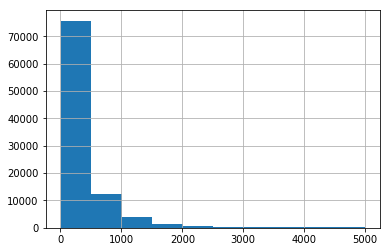

In [7]:
lens.hist()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(min_df=3,stop_words='english',ngram_range=(1,3),max_df=0.7, sublinear_tf=1)

In [9]:
from sklearn.cross_validation import train_test_split
df_x=train["comment_text"]
df_y=train["insult"]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x_train.head()

52521    Somebody too incompetent to be stationed anywh...
3296     "\nPity we can't  indicate the size of the org...
46761    Yes indeed, be among the first to join the boo...
91123    D Macks You are a pathetic american who will d...
5735     I beat you to it in moving something to the wr...
Name: comment_text, dtype: object

In [11]:
x_traincv=cv.fit_transform(x_train)

In [12]:
print(len(cv.get_feature_names()))

149220


In [13]:
a=x_traincv.toarray()

In [14]:
len(a)

76680

In [15]:
sum(a[0])

4.616048373022906

In [16]:
cv.inverse_transform(a[0])

[array(['absolutely', 'absolutely love', 'bit', 'cid', 'demonstrate',
        'friend', 'hand', 'incompetent', 'know', 'know quite',
        'know quite bit', 'knowledge', 'love', 'military', 'pussy', 'quite',
        'quite bit', 'somebody', 'stationed', 'unit', 'wasn', 'yes',
        'yes know'],
       dtype='<U88')]

In [17]:
x_train.iloc[0]

"Somebody too incompetent to be stationed anywhere else. Yes I do know quite a bit about the military and I would absolutely love to demonstrate that knowledge with you first-hand. I wasn't in some pussy CID unit friend."

In [18]:
y_train.iloc[0]

0

In [19]:
x_testcv=cv.transform(x_test)

In [20]:
x_testcv.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16440054,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
len(x_testcv.toarray())

19171

In [22]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_train=y_train.astype('int')

In [23]:
y_train

52521    0
3296     0
46761    0
91123    0
5735     0
89686    0
6711     0
57727    0
54349    0
1567     0
88728    0
50193    0
47216    0
27953    1
56740    0
95116    0
29857    0
36224    0
41646    0
66643    0
66622    0
46836    1
91887    0
57917    0
60275    0
87089    0
22855    0
38247    0
29971    0
14373    0
        ..
88407    0
68538    0
11586    0
52785    0
85640    0
79221    0
4802     1
21990    0
30205    0
59814    0
57493    0
51733    0
25600    0
9603     0
67124    0
73706    0
7212     0
32616    0
46393    0
95159    0
20062    1
79981    0
73575    0
65276    0
94601    0
23346    0
11863    0
92599    0
73902    0
83066    0
Name: insult, Length: 76680, dtype: int64

In [24]:
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
testmessage=x_test.iloc[0]

In [26]:
testmessage

'File:UmDSC 4220-724661.jpg listed for deletion \nA file that you uploaded or altered, File:UmDSC 4220-724661.jpg, has been listed at Wikipedia:Files for deletion. Please see the discussion to see why it has been listed (you may have to search for the title of the image to find its entry). Feel free to add your opinion on the matter below the nomination. Thank you.'

In [27]:
predictions=mnb.predict(x_testcv)

In [28]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
a=np.array(y_test)

In [30]:
a

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
count = 0
for i in range (len(predictions)):
    if predictions[i]==a[i]:
        count=count+1

In [32]:
count

18297

In [33]:
len(predictions)

19171

In [34]:
count/len(predictions)

0.9544103072348861

In [35]:
from sklearn.metrics import confusion_matrix


In [36]:
confusion_matrix(a, predictions)

array([[18221,    17],
       [  857,    76]])

In [37]:
from sklearn.metrics import precision_recall_fscore_support

In [38]:
precision_recall_fscore_support(a, predictions)

(array([ 0.95507915,  0.8172043 ]),
 array([ 0.99906788,  0.08145766]),
 array([ 0.97657841,  0.14814815]),
 array([18238,   933]))